In [1]:
#newsapi.ai key: d9052625-a43b-4f63-b861-c1c8abe115bc
#newsAPI key: c3645cc0bc8044bb97ddf2951e63c9fd
#!pip install requests_html

NewsAPI HTTP Status Codes
200	Success. Everything worked as expected.
204	Information not available. Request succeeded, but the requested information is not available.
400	Bad request. The request was unacceptable, most likely due to invalid or missing parameter.
401	User's limit reached. The user reached the limit of the tokens in his account. The requests are rejected.
403	Forbidden. The user's IP or account is disabled, or if all the tokens have been used. Check the error message for more details.
500	Internal error. Internal error occured while processing the request.
503	Service unavailable. The service is currently not available.

In [1]:
import requests  #to query the API 
import re  #regular expressions
import pandas as pd   # for dataframes
import json

import sklearn
from sklearn.feature_extraction.text import CountVectorizer  
 
#for text vectorization
#print(sklearn.__version__)

#from requests_html import HTMLSession
#from requests_html import AsyncHTMLSession

source": {
"id": "the-washington-post",
"name": "The Washington Post"
}

source": {
"id": "cbs-news",
"name": "CBS News"

"source": {
"id": "espn",
"name": "ESPN"

"source": {
"id": "associated-press",
"name": "Associated Press"
    
-"source": {
"id": "cnn",
"name": "CNN"
    
"source": {
"id": null,
"name": "BBC News"
    
source": {
"id": "fox-news",
"name": "Fox News"
    
    "source": {
"id": "abc-news",
"name": "ABC News"

In [6]:
## Create a new csv file to save the headlines
filename='Sourcequery_jsontxt.csv'

In [13]:
MyFILE=open(filename,"w")
### Place the column names in - write to the first row
WriteThis="Source,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [12]:
#erases file content if you need to overwrite during troubleshooting
MyFILE=open(filename,"r+")
MyFILE.truncate(0)

0

In [56]:

url2 = ('https://newsapi.org/v2/everything?'
       'q=(transgender)AND(youth+OR+minor+OR+minors+OR+children+OR+child)&'
        'page=6&'
       #'from=2021-02-06&' 
       #'to=2020-03-07&'
       #'pageSize=100&'
       #'language=en&'
       #'sources=cbs-news,cnn,fox-news,abc-news,the-washington-post&'
       'apiKey=c3645cc0bc8044bb97ddf2951e63c9fd'
)
print(url2)

https://newsapi.org/v2/everything?q=(transgender)AND(youth+OR+minor+OR+minors+OR+children+OR+child)&page=6&apiKey=c3645cc0bc8044bb97ddf2951e63c9fd


In [57]:
r2 = requests.get(url2)
print(r2)

jsontxt2 = r2.json()
#print(jsontxt2)

<Response [426]>


In [55]:


## Open the file for append
MyFILE=open(filename, "a")
for items in jsontxt2['articles']:
    #print(items) #prints each article as a dictionary
    #print(items['content'], "\n\n\n")
    source=items["source"]["id"]
    if source is None:
        source = items["source"]["name"]
    elif source == "[Removed]":
        source = "None"
    
    
    Headline=items["description"]
    if Headline == "[Removed]":
        Headline = "None"
    Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
    ## Be sure there are no commas in the headlines or it will
    ## write poorly to a csv file....
    Headline=Headline.replace(',', '')
    Headline=' '.join(Headline.split())
    Headline=re.sub("\n|\r", "", Headline)
    
    ### AS AN OPTION - remove words of a given length............
    Headline = ' '.join([wd for wd in Headline.split() if (len(wd)>3 & len(wd)<14)])

    #print("Author: ", Author, "\n")
    #print("Title: ", Title, "\n")
    #print("Headline News Item: ", Headline, "\n\n")
    
    WriteThis=str(source)+","+str(Headline) + "\n"
    
    MyFILE.write(WriteThis)
    
## CLOSE THE FILE
MyFILE.close()

In [58]:
## Read to DF
newsAPI_df=pd.read_csv(filename, on_bad_lines = 'warn')
#print(newsAPI_df.head())
# iterating the columns 
#for col in newsAPI_df.columns: 
#    print(col) 
    
#df = pd.DataFrame(newsAPI_df)
#df
#newsAPI_df['Label'] = "TransYouth"

In [59]:
newsAPI_df.head()

,Source,Headline
0,abc-news,lawsuit been filed against Ohio House Bill whi...
1,abc-news,Missouri bill would make felony offense school...
2,abc-news,England National Health Service banned puberty...
3,abc-news,Nassau County Executive Bruce Blakeman filed l...
4,abc-news,office argues that order clear violation York ...


In [60]:

## REMOVE any rows with NaN in them
print(len(newsAPI_df["Headline"]))

newsAPI_df.drop(newsAPI_df[newsAPI_df['Headline'] == "None"].index, inplace = True)
newsAPI_df.drop(newsAPI_df[newsAPI_df['Source'] == "[Removed]"].index, inplace = True)

print(len(newsAPI_df["Headline"]))
#print(df.loc[30,:])

### Tokenize and Vectorize the Headlines
## Create the list of headlines
#HeadlineLIST=[]
#for next1 in newsAPI_df["Headline"]:
#    HeadlineLIST.append(next1)

#print("The headline list is")
#print(HeadlineLIST, len(HeadlineLIST))

622
596


In [61]:
newsAPI_df.to_csv('HeadlineSources.csv')

In [43]:
#newsAPI_df3['Label'] = "Gender_14-24"

In [62]:
#combined_df = pd.concat([newsAPI_df,newsAPI_df2, newsAPI_df3, newsAPI_df4], ignore_index=True)

#combined_df.head()

In [63]:
!pip install WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import csv
import re

  Using cached wordcloud-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511 kB)


In [64]:
text1 = newsAPI_df['Headline'].to_string(index=False).lower()
text1 = text1.replace('\n', " ")


In [67]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text1)

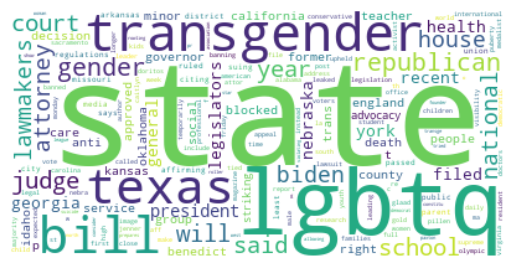

In [68]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()